# Curve Fitting and Interpolation

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Curve fitting
    - Curve fitting using error functions and [`scipy.optimize.fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)
        - Sum of squared error
        - Sum of absolute error
        - Maximum absolute error
    - Choice of error functions
    - General curve fitting by [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
    - Curve fitting of polynomials by [`numpy.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and [`numpy.polyval()`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html)
- Interpolation
    - Interpolation by [`scipy.interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)

## Curve fitting and error functions

Goal: find the parameters $\mathbf{k}$ to a fitting function $f(x, \mathbf{k})$ given data points $(\mathbf{x, y})$ to fit to achieve the lowest error.

Given data points $(\mathbf{x, y})$, where $\mathbf{x} = [x_1, \dots, x_n]$ and $\mathbf{y} = [y_1, \dots, y_n]$.

The sum of squared error (SSE) is defined as

$$
\mathrm{SSE} \equiv \sum\limits_{i=1}^n (f(x_i, \mathbf{k}) - y_i)^2 = \Vert f(\mathbf{x, k}) - \mathbf{y} \Vert_2^2
$$

The sum of absolute error (SAE) is defined as

$$
\mathrm{SAE} \equiv \sum\limits_{i=1}^n |f(x_i, \mathbf{k}) - y_i|
$$

The maximum absolute error (MAE) is defined as

$$
\mathrm{MAE} \equiv \max_i |f(x_i, \mathbf{k}) - y_i| = \Vert f(\mathbf{x, k}) - \mathbf{y} \Vert_\infty
$$

Average error is most resistant to outliers. Maximum error is sensitive to outliers. Sum of squared error penalizes large errors.

Minimization of error function by [`scipy.optimize.fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) can give desired parameter.

### Implementation

**Problem Statement.** The Gaussian function has the form

$$
f(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
$$

(a) Generate a Gaussian data of such form in the domain $[0, 5]$ with $\sigma = 1, \mu = 2.5$ and add a random noise in the range of $[-0.1, 0.1)$. Change the 4th data point to 1 to create an outlier.

(b) Fit the data with the Gaussian function using SSE, SAE, and MAE defined above.

(c) Fit the data using `scipy.optimize.curve_fit()`

(d) Plot the resulting fit and discuss the resistance to outliers of each error.

#### Generate data

In [1]:
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# generate data
np.random.seed(1)
gaussian = lambda x, sigma, mu : 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x - mu)**2 / (2*sigma**2))
gaussian_data_x = np.arange(0, 5.25, 0.25)
gaussian_data_y = np.array([gaussian(i, 1, 2.5) + 0.2*(np.random.random() - 0.5) for i in gaussian_data_x])
gaussian_data_y[3] = 1  # create outlier

#### Curve fitting using error functions and `scipy.optimize.fmin()`

In [3]:
# define fitting function
gaussian = lambda x, sigma, mu : 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x - mu)**2 / (2*sigma**2))

In [4]:
def sse(k):
    '''
    Finds sum of squared error of data point and fitting function with given params.
    Note that the coordinates of data points and the fitting function is interited from global.
    This design is needed for scipy.optimize.fmin input.
    
    :params k: parameters of fitting function
    :returns: sum of squared error
    '''
    
    X = gaussian_data_x
    Y = gaussian_data_y
    f = gaussian
    error = sum((Y - f(X, *k))**2)
    return error

In [5]:
def sae(k):
    '''
    Finds sum of absolute error of data point and fitting function with given params.
    Note that the coordinates of data points and the fitting function is interited from global.
    This design is needed for scipy.optimize.fmin input.
    
    :params k: parameters of fitting function
    :returns: sum of absolute error
    '''
    
    X = gaussian_data_x
    Y = gaussian_data_y
    f = gaussian
    error = sum(abs(Y - f(X, *k)))
    return error

In [6]:
def mae(k):
    '''
    Finds maximum of absolute error of data point and fitting function with given params.
    Note that the coordinates of data points and the fitting function is interited from global.
    This design is needed for scipy.optimize.fmin input.
    
    :params k: parameters of fitting function
    :returns: maximum of absolute error
    '''
    
    X = gaussian_data_x
    Y = gaussian_data_y
    f = gaussian
    error = max(abs(Y - f(X, *k)))
    return error

In [7]:
initial_guess = [1, 2]
sse_fit_params = scipy.optimize.fmin(sse, initial_guess)
sse_fit_x = np.linspace(0, 5, 100)
sse_fit_y = gaussian(sse_fit_x, *sse_fit_params)
sse_fit_params

Optimization terminated successfully.
         Current function value: 0.854724
         Iterations: 30
         Function evaluations: 57


array([1.18010444, 2.23083503])

In [8]:
initial_guess = [1, 2]
sae_fit_params = scipy.optimize.fmin(sae, initial_guess)
sae_fit_x = np.linspace(0, 5, 100)
sae_fit_y = gaussian(sae_fit_x, *sae_fit_params)
sae_fit_params

Optimization terminated successfully.
         Current function value: 1.739172
         Iterations: 38
         Function evaluations: 75


array([0.93549152, 2.6457473 ])

In [9]:
initial_guess = [1, 2]
mae_fit_params = scipy.optimize.fmin(mae, initial_guess)
mae_fit_x = np.linspace(0, 5, 100)
mae_fit_y = gaussian(mae_fit_x, *mae_fit_params)
mae_fit_params

Optimization terminated successfully.
         Current function value: 0.483690
         Iterations: 46
         Function evaluations: 86


array([0.73508355, 0.98207847])

#### Curve fitting using `scipy.optimize.curve_fit()`

[`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) takes in functional form and data points and returns the coefficients of best fit.

In [10]:
# use scipy.optimize.curve_fit()
scipy_fit_params, pcov = scipy.optimize.curve_fit(gaussian, gaussian_data_x, gaussian_data_y)
scipy_fit_x = np.linspace(0, 5, 100)
scipy_fit_y = gaussian(scipy_fit_x, *scipy_fit_params)
scipy_fit_params

array([1.18008327, 2.23083067])

#### Plotting

In [11]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

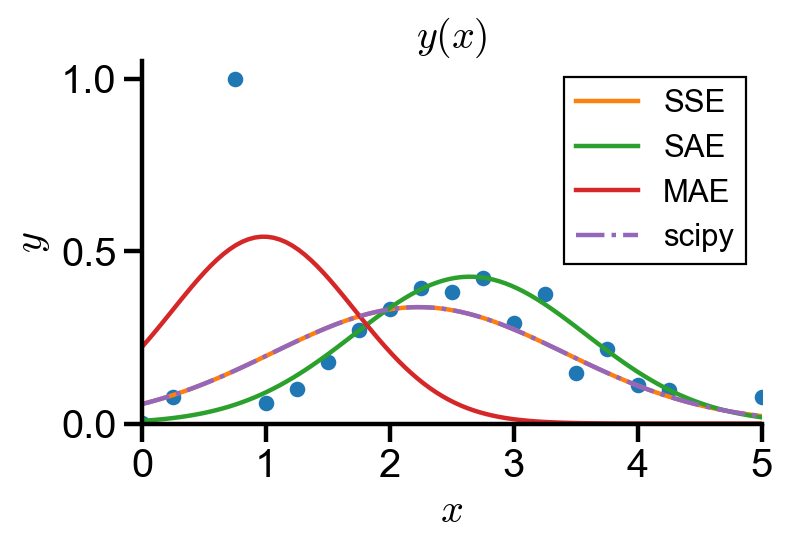

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(gaussian_data_x, gaussian_data_y, 'o')
ax.plot(sse_fit_x, sse_fit_y, label='SSE')
ax.plot(sae_fit_x, sae_fit_y, label='SAE')
ax.plot(mae_fit_x, mae_fit_y, label='MAE')
ax.plot(scipy_fit_x, scipy_fit_y, '-.', label='scipy')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$y(x)$')
ax.set_xlim(0, 5)
ax.set_ylim(0)
ax.legend()

As shown in the graph, maximum of absolute error is very sensitive to outliers, and sum of absolute error is resistant to outliers. `scipy.optimize.curve_fit()` uses the sum of squared error.

## Curve fitting of polynomial functions using `numpy`

[`numpy.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) takes in data points and polynomial order and returns the coefficients of best fit polynomial.

[`numpy.polyval()`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) takes in polynomial coefficients and x point(s) to be evaluated.

### Implementation

**Problem Statement.** Fitting linear data.

(a) Generate a linear data of the form $f(x) = x$ in the domain $[0, 5]$ and add a random noise in the range of $[0, 1)$. Change the 4th data point to 1 to create an outlier.

(b) Fit the data with the linear fit $y=kx+b$ using `numpy.polyfit()`.

(c) Plot the resulting fit using `numpy.polyval()`.

In [13]:
# generate data
np.random.seed(1)
linear_data_x = np.arange(0, 5.25, 0.25)
linear_data_y = np.array([i + np.random.random() for i in linear_data_x])

In [14]:
# polynomial fit (linear in this case)
linear_fit_x = np.linspace(0, 5, 100)
linear_fit_coeff = np.polyfit(linear_data_x, linear_data_y, 1)
linear_fit_y = np.polyval(linear_fit_coeff, linear_fit_x)

(0.0, 6.076120631559354)

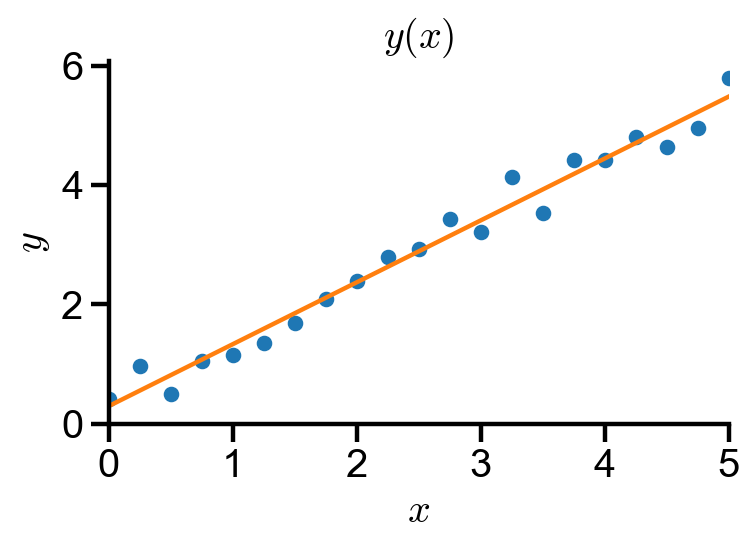

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(linear_data_x, linear_data_y, 'o')
ax.plot(linear_fit_x, linear_fit_y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$y(x)$')
ax.set_xlim(0, 5)
ax.set_ylim(0)

## Interpolation using `scipy`

[`scipy.interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) provides interpolation of zeroth, first, second, and third order (constant, linear, quadratic, cubic) of scalar functions.

### Implementation

**Problem Statement.** Interpolating linear data.

(a) Generate a linear data of the form $f(x) = x$ in the domain $[0, 5]$ and add a random noise in the range of $[0, 1)$. Change the 4th data point to 1 to create an outlier.

(b) Interpolate the data using `scipy.interpolate.interp1d()` for zeroth order, linear, quadratic, and cubic spline.

(c) Plot the resulting interpolation.

In [16]:
import scipy
from scipy import interpolate

In [17]:
# generate data
np.random.seed(1)
linear_data_x = np.arange(0, 5.25, 0.25)
linear_data_y = np.array([i + np.random.random() for i in linear_data_x])

In [18]:
# linear spline
spline_x = np.linspace(0, 5, 100)
f_zero = scipy.interpolate.interp1d(linear_data_x, linear_data_y, kind='zero')
f_linear = scipy.interpolate.interp1d(linear_data_x, linear_data_y, kind='linear')
f_quadratic = scipy.interpolate.interp1d(linear_data_x, linear_data_y, kind='quadratic')
f_cubic = scipy.interpolate.interp1d(linear_data_x, linear_data_y, kind='cubic')

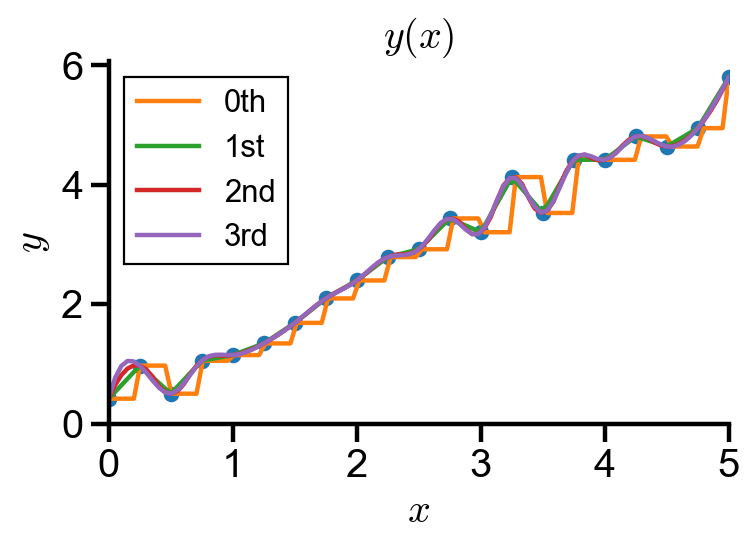

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(linear_data_x, linear_data_y, 'o')
ax.plot(spline_x, f_zero(spline_x), label='0th')
ax.plot(spline_x, f_linear(spline_x), label='1st')
ax.plot(spline_x, f_quadratic(spline_x), label='2nd')
ax.plot(spline_x, f_cubic(spline_x), label='3rd')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$y(x)$')
ax.set_xlim(0, 5)
ax.set_ylim(0)
ax.legend()